<a href="https://colab.research.google.com/github/Manisha1208/NNDL/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BATCH GRADIENT DESCENT (ON REAL TIME DATA)

In [44]:
# importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [46]:
# READING THE  DATA SET
data = pd.read_csv("/content/Assignment_8.csv")
data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


DATA ANALYSIS AND VISUALISATION

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [48]:
data.describe()

,X,Y
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


NULL value Treatment

In [49]:
data.isnull().sum()

X    0
Y    0
dtype: int64

Observation: the given dataset do not contain any null values

Outliners Treatment

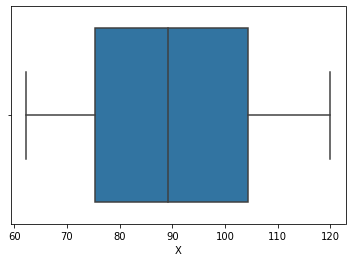

In [50]:
sns.boxplot(x=data['X'])

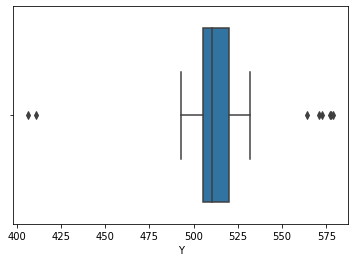

In [52]:
sns.boxplot(x=data['Y'])

In [53]:
# Z-SCORE
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


In [54]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


Observation:no outliners are found using Z-score test

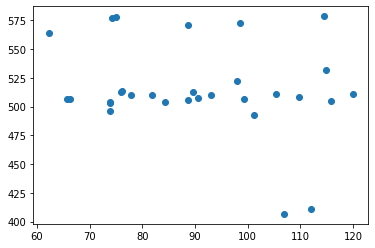

In [55]:
# Visualising data points using a Scatter plot
plt.scatter(data['X'],data['Y'])

In [56]:
# Implementing ITQ
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr

X    29.075
Y    14.600
dtype: float64

In [57]:
data.shape

(30, 2)

In [58]:
data_cleared = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(22, 2)

After implementing ITQ, 8 rows are treated as outliners and those are ignored from dataset

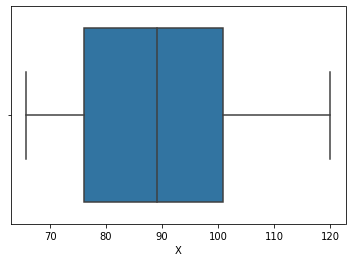

In [59]:
sns.boxplot(x=data_cleared['X'])

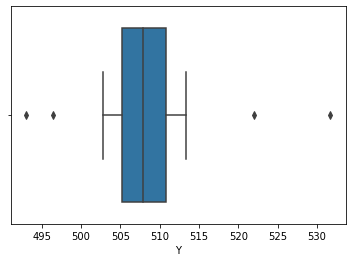

In [60]:

# outliners are reduced
sns.boxplot(x=data_cleared['Y'])

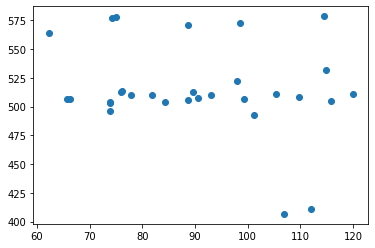

In [61]:
# scatter plot of data before data clean
plt.scatter(data['X'],data['Y'])

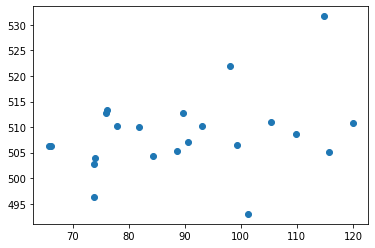

In [62]:
#scatter plot of data after data clean
plt.scatter(data_cleared['X'],data_cleared['Y'])

In [63]:

data2 = data.copy()
data = data_cleared.copy()

In [64]:
from sklearn.model_selection import train_test_split

Normalisation Of Data Set

In [23]:
data_x = data['X']
data_y = data['Y']

# normalising the data
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x

data_x = np.array(data_x)
data_y = np.array(data_y)
datas =[]
for i in range(len(data_x)):
  datas.append([data_x[i],data_y[i]])

datas[1:10]


[[0.45672191528545114, 0.364341085271318],
 [0.14917127071823194, 0.08785529715762205],
 [0.9226519337016574, 0.31524547803617503],
 [0.6206261510128914, 0.3462532299741592],
 [0.5027624309392265, 0.44444444444444364],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.009208103130755065, 0.34366925064599474],
 [0.22467771639042364, 0.44444444444444364]]

In [65]:
# splitting of data set into training and testing
data_train,data_test = train_test_split(datas,test_size=0.1)

In [66]:
data_train

[[0.0, 0.3410852713178288],
 [0.14917127071823194, 0.08785529715762205],
 [0.9042357274401472, 1.0],
 [0.6556169429097605, 0.0],
 [0.3425414364640883, 0.2919896640826873],
 [0.7311233885819522, 0.4625322997416009],
 [0.5027624309392265, 0.44444444444444364],
 [0.45672191528545114, 0.364341085271318],
 [0.22467771639042364, 0.44444444444444364],
 [0.1878453038674034, 0.5116279069767424],
 [1.0, 0.4599483204134365],
 [0.5948434622467771, 0.7493540051679578],
 [0.15101289134438312, 0.2816537467700249],
 [0.14917127071823194, 0.2532299741602067],
 [0.009208103130755065, 0.34366925064599474],
 [0.29834254143646416, 0.4392764857881132],
 [0.19337016574585636, 0.5271317829457353],
 [0.44014732965009196, 0.5116279069767424],
 [0.8121546961325966, 0.40310077519379856]]

Ready To Train The Model

In [67]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 300
alpha = 0.1
error = []
data_train

[[0.0, 0.3410852713178288],
 [0.14917127071823194, 0.08785529715762205],
 [0.9042357274401472, 1.0],
 [0.6556169429097605, 0.0],
 [0.3425414364640883, 0.2919896640826873],
 [0.7311233885819522, 0.4625322997416009],
 [0.5027624309392265, 0.44444444444444364],
 [0.45672191528545114, 0.364341085271318],
 [0.22467771639042364, 0.44444444444444364],
 [0.1878453038674034, 0.5116279069767424],
 [1.0, 0.4599483204134365],
 [0.5948434622467771, 0.7493540051679578],
 [0.15101289134438312, 0.2816537467700249],
 [0.14917127071823194, 0.2532299741602067],
 [0.009208103130755065, 0.34366925064599474],
 [0.29834254143646416, 0.4392764857881132],
 [0.19337016574585636, 0.5271317829457353],
 [0.44014732965009196, 0.5116279069767424],
 [0.8121546961325966, 0.40310077519379856]]


Gradient Descent Algorithm

In [68]:
# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  der_m = 0
  der_c = 0
  err = 0
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m += ((data_train[i][1] - (m * data_train[i][0]) - c ))*(data_train[i][0])
    der_c +=  (data_train[i][1] - (m * data_train[i][0]) - c )

  # computing error rate with present m and c values 
  err = (der_c)**2
  err = (err)/(2*len(data_train))
  error.append(err)


  der_m = (-1)*(1/len(data_train))*der_m
  der_c = (-1)*(1/len(data_train))*der_c

  # calculating change in m and c
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c

  #updating m and c
  m = m + change_m
  c = c + change_c


  #incrementing no of iterations
  iter = iter + 1

In [69]:
# computed slope and y-intercept
print(m,c)

0.4022480439685797 0.2476321542431627


In [70]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.92265193 0.42173112 0.62062615]


array([0.31524548, 0.32041344, 0.34625323])

In [71]:

# predicting results of test data set
pred = []
for i in range(len(data_test_x)):
  print((m*data_test_x[i]) +c)
  pred.append((m*data_test_x[i]) +c)

0.618767089838482
0.4172726737068915
0.49727780952384665



Mean Squared error of testing data

In [72]:
# computig mean squared error of testing data
mse = 0
for i in range(0,len(data_test)):
  mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

0.041438501418079754


Predicted Data Visualisation

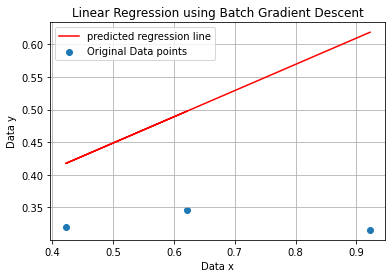

In [73]:
plt.scatter(data_test_x,data_test_y,label="Original Data points")
plt.plot(data_test_x,pred,'r',label="predicted regression line")
plt.title("Linear Regression using Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

In [74]:
data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train[0] + c
data_train_pred

0     0.247632
1     0.307636
2     0.611359
3     0.511353
4     0.385419
5     0.541725
6     0.449867
7     0.431348
8     0.338008
9     0.323193
10    0.649880
11    0.486907
12    0.308377
13    0.307636
14    0.251336
15    0.367640
16    0.325415
17    0.424681
18    0.574320
Name: 0, dtype: float64

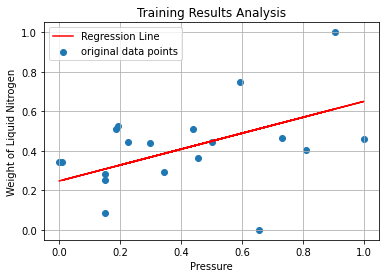

In [75]:

plt.plot(data_train[0],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [76]:
data_train.head()

,0,1
0,0.000000,0.341085
1,0.149171,0.087855
2,0.904236,1.000000
3,0.655617,0.000000
4,0.342541,0.291990


Error Rate Analysis

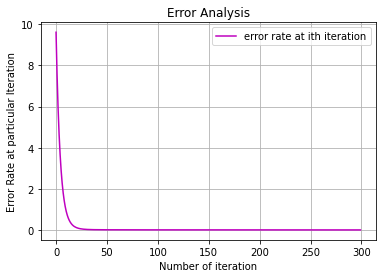

In [77]:

iters = np.arange(epochs)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()

Mean Squared Error Of Training Data

In [78]:
# computig mean squared error
mse = 0
mse = (data_train[1] - m*data_train[0] - c)**2
mse.sum()/len(data_train)

0.038724537180466374

In [79]:
min_x = data2['X'].min()
max_x = data2['X'].max()
min_y = data2['Y'].min()
max_y = data2['Y'].max()
print(min_x,min_y,max_x,max_y)

62.2 406.7 120.0 578.6


Model Ready To Take Input and Produce Output

In [80]:
input_x = float(input("enter pressure"))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

enter pressure75.1


464.70030399226755

In [81]:

err = 0
for i in range(0,len(data_x)):
  input_x = data2['X'][i]
  input_x = (input_x - min_x)/(max_x - min_x)
  output_y = m*input_x + c
  output_y = (output_y)*(max_y - min_y) + min_y
  err += (output_y-data2['Y'][i])**2
  print(output_y,data2['Y'][i])

print("\n",err)
print(err/len(data_x))

464.70030399226755 577.8
463.743259857206 577.0
480.9700542883144 570.9
511.9543581609329 578.6
492.69384494281866 572.4
508.8439647219828 411.2
512.1936191946983 531.7
449.2679673143997 563.9
502.8624388778479 406.7
483.1234035922029 507.1
463.14510727279253 496.4
513.3899243635252 505.2
493.77051959476296 506.4
486.1141665142703 510.2
463.2647377896752 503.9
453.45503540529404 506.2
454.05318798970757 506.3
468.0499584649831 510.2
506.21209335056346 508.6
500.9483506077248 510.9
480.8504237714317 505.4
482.0467289402586 512.8

 89883.56366397867
4085.6165301808487
